In [73]:
from fetch_Dandeliion import fetch_dandeliion

In [65]:
import requests, zipfile, io, os
from math import exp, tanh, log

def extract_function(para_url, field_id):
    response = requests.get(para_url)
    response.raise_for_status()
    field_id_bytes = bytes(field_id, 'utf-8')
    raw_bytes=response.content.partition(field_id_bytes)[2].lstrip(b'">\n').partition(b'</textarea>')[0]
    func_str = raw_bytes.decode('utf-8').replace('\r','').replace('\n','')
    return lambda x: eval(func_str)
    
def fetch_dandeliion(url, file_id, save_dir=None):
    """
    Fetch the data_and_plt_files.zip for a Dandeliion simulation and unzip it to the selected folder.
    Return solid diffusivity and Ueq as anonymous functions.

    url: The url of the Dandeliion run
    file_id: subdirectory name for the data files
    save_dir: The directory to save the subdirectory in (default: None, corresponding to not fetching)
    
    returns

    D_a(x)
    D_c(x)
    U_eq^a(x)
    U_eq^c(x)
    """

    # Check the address is valid
    response = requests.get(url)
    response.raise_for_status()

    # The path for the resubmission page, with the U_eq and D(c) functions to be read
    para_url = url.replace("?id=","")+'/'

    D_a = extract_function(para_url, 'id_diff_a')
    D_c = extract_function(para_url, 'id_diff_c')
    Ueq_a = extract_function(para_url, 'id_ueq_a')
    Ueq_c = extract_function(para_url, 'id_ueq_c')


    if save_dir:
        # Exctract the path of the data_and_plt_files.zip
        file_url = '/'.join(url.split('/')[:-1]) + '/'  # Original address
        # Add the relative address:
        file_url += response.content.partition(b'data_and_plt_files.zip')[0].split(b'a href="')[-1].decode('utf-8')
        # Add the zip file:
        file_url += 'data_and_plt_files.zip'
    
        # Now get the file
        response = requests.get(file_url)
        response.raise_for_status() # Raise error if the link doesn't work
    
        # Unzip it
        with zipfile.ZipFile(io.BytesIO(response.content)) as z:
            os.makedirs(save_dir + file_id , exist_ok=True)
            z.extractall(save_dir + file_id)  # Specify extraction directory

    return D_a, D_c, Ueq_a, Ueq_c

In [2]:
fetch_dandeliion('https://simulation.dandeliion.com/legacy/simulation/?id=d91db0e5-e0bb-4391-936c-50c69f267c24', 'blbab')

(<function fetch_Dandeliion.extract_function.<locals>.<lambda>(x)>,
 <function fetch_Dandeliion.extract_function.<locals>.<lambda>(x)>,
 <function fetch_Dandeliion.extract_function.<locals>.<lambda>(x)>,
 <function fetch_Dandeliion.extract_function.<locals>.<lambda>(x)>)

In [3]:
url_list = ["https://simulation.dandeliion.com/static/results/40751b48-307b-46fb-bcb9-5b3ab79b3b5c/data_and_plt_files.zip",
            "https://simulation.dandeliion.com/static/results/d91db0e5-e0bb-4391-936c-50c69f267c24/data_and_plt_files.zip",
            "https://simulation.dandeliion.com/static/results/3865ded1-60e1-439b-82b3-65a0ec8c5b0c/data_and_plt_files.zip"
           ]
id_list = ["LGM50_cathode_halfcell_kickrelax",
           "LGM50_cathode_halfcell_C005",
           "LGM50_cathode_halfcell_C010"
          ]

# Default directory to save the extracted files
save_dir = "./Dandeliion_Simulations/"

for url, file_id in zip(url_list, id_list):
    response = requests.get(url)
    response.raise_for_status() # Raise error if the link doesn't work
    
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        os.makedirs(save_dir + file_id , exist_ok=True)
        z.extractall(save_dir + file_id)  # Specify extraction directory
    

In [84]:
url = 'https://simulation.dandeliion.com/legacy/simulation/?id=d91db0e5-e0bb-4391-936c-50c69f267c24'

response = requests.get(url)
response.raise_for_status()
# Exctract the path for the data zip
file_url = '/'.join(url.split('/')[:-1]) + '/' + response.content.partition(b'data_and_plt_files.zip')[0].split(b'a href="')[-1].decode('utf-8') + 'data_and_plt_files.zip'

# Now get the file 
response = requests.get(file_url)
response.raise_for_status() # Raise error if the link doesn't work

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    os.makedirs(save_dir + file_id , exist_ok=True)
    z.extractall(save_dir + file_id)  # Specify extraction directory


In [74]:
import requests, zipfile, io, os

url = 'https://simulation.dandeliion.com/legacy/simulation/?id=d91db0e5-e0bb-4391-936c-50c69f267c24'
response = requests.get(url)
response.raise_for_status()
# Exctract the path for the data zip
file_url = '/'.join(url.split('/')[:-1]) + '/' + response.content.partition(b'data_and_plt_files.zip')[0].split(b'a href="')[-1].decode('utf-8') + 'data_and_plt_files.zip'

para_url = url.replace("?id=","")+'/'

In [102]:
from math import exp, tanh, log
def extract_function(para_url, field_id):
    response = requests.get(para_url)
    response.raise_for_status()
    field_id_bytes = bytes('id="'+field_id, 'utf-8')
    raw_bytes=response.content.partition(field_id_bytes)[2].lstrip(b'">\n').partition(b'</textarea>')[0]
    func_str = raw_bytes.decode('utf-8').replace('\r','').replace('\n',' ')
    return func_str

In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [158]:
np.array(list(map(float,extract_function(para_url, "id_current").split()))).reshape(-1,2).T

array([[ 0.000000e+00,  1.000000e-02,  9.480000e+00,  7.200000e+04,
         7.200001e+04,  1.440000e+05],
       [ 0.000000e+00,  3.690000e-04,  3.690000e-04,  3.690000e-04,
        -3.690000e-04, -3.690000e-04]])

In [159]:
np.fromstring(extract_function(para_url, "id_current"), sep=' ').reshape(-1,2).T

array([[ 0.000000e+00,  1.000000e-02,  9.480000e+00,  7.200000e+04,
         7.200001e+04,  1.440000e+05],
       [ 0.000000e+00,  3.690000e-04,  3.690000e-04,  3.690000e-04,
        -3.690000e-04, -3.690000e-04]])

In [144]:
I_int = lambda t: np.interp(t, *np.array(list(map(float,extract_function(para_url, "id_current").split()))).reshape(-1,2).T)

In [147]:
t_vals = np.linspace(0,144000, 1000)

In [143]:
np.array(list(map(float,extract_function(para_url, "id_current").split()))).reshape(-1,2).T

array([[ 0.000000e+00,  1.000000e-02,  9.480000e+00,  7.200000e+04,
         7.200001e+04,  1.440000e+05],
       [ 0.000000e+00,  3.690000e-04,  3.690000e-04,  3.690000e-04,
        -3.690000e-04, -3.690000e-04]])

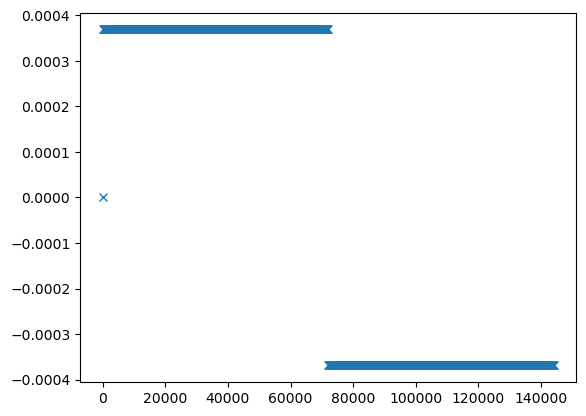

In [148]:
plt.plot(t_vals, I_int(t_vals), 'x')

In [75]:
bla = requests.get(para_url).content

In [76]:
bla

b'\n<html lang="en-US">\n    <head>\n        <!-- Global site tag (gtag.js) - Google Analytics -->\n        <script async src="https://www.googletagmanager.com/gtag/js?id=UA-175882862-1"></script>\n        <script>\n          window.dataLayer = window.dataLayer || [];\n          function gtag(){dataLayer.push(arguments);}\n          gtag(\'js\', new Date());\n\n          gtag(\'config\', \'UA-175882862-1\');\n        </script>\n        <meta charset="UTF-8">\n        <meta name="description" content="DandeLiion - Ultra-Fast Online Solution to the Newman Model of Li-Ion Battery Performance">\n        <meta name="keywords" content="DandeLiion, simulation, solver, Li-Ion, battery, Newman model">\n        <!--  -->\n        \n            <title>DandeLiion | Submit a new simulation</title>\n        \n        <link rel="stylesheet" id="ample-style-css" href="/static/style.css" type="text/css" media="all">\n        <link rel="icon" type="image/png" href="/static/favicon.png"/>\n    </head>\n 

# HERE:
How do I read the input current??

In [39]:
extract_function(para_url, '"id_current"')

'Charge/discharge current, A:</label>        <p><em>            For constant current, type a single value (for example, <code>-0.015</code>).            Positive values correspond to cell charging where the anode is lithiating and the cathode is delithiating.            Negative values correspond to discharge.            For time-varying currents, provide a two-column table            (the first column is the time in seconds, the second column is the current in Amperes).            The table can be copied and pasted into the field directly from a spreadsheet (e.g. MS Excel).            The values between the points will be linearly interpolated.        </em></p>        <span class="error"></span>        <textarea name="current" cols="40" rows="8" style="resize:none;" maxlength="524288" required id="id_current">0 00.01 0.0003699.48 0.00036972000 0.00036972000.01 -0.000369144000 -0.000369'

In [45]:
bla.split(b'"id_current"')[2]

b'>\n0 0\r\n0.01 0.000369\r\n9.48 0.000369\r\n72000 0.000369\r\n72000.01 -0.000369\r\n144000 -0.000369</textarea>\n\n        <span class="error"></span>\n        <p>\n            <label for="id_dt_max">\n                Maximum time step (optional), s: &nbsp;\n            </label>\n            <input type="number" name="dt_max" value="1.0" step="0.1" id="id_dt_max">\n        </p>\n        <p><em>\n            This option is recommended if you have a time-varying current;\n            restrict the timestep to be finer than the resolution in the your current demand.\n        </em></p>\n\n        <br>\n        <p><strong>Spatial discretisation method:</strong></p>\n        <p><em>\n            Finite Volume discretisation is the most common method but it has only 1<sup>st</sup> order of approximation.\n            An alternative discretisation scheme uses Finite Elements in electrolyte and Control Volumes in solid particles\n            providing 2<sup>nd</sup> order of approximation in t

In [17]:
extract_function(para_url, 'current')

''

In [9]:
bla.split(b'id_current')

[b'\n<html lang="en-US">\n    <head>\n        <!-- Global site tag (gtag.js) - Google Analytics -->\n        <script async src="https://www.googletagmanager.com/gtag/js?id=UA-175882862-1"></script>\n        <script>\n          window.dataLayer = window.dataLayer || [];\n          function gtag(){dataLayer.push(arguments);}\n          gtag(\'js\', new Date());\n\n          gtag(\'config\', \'UA-175882862-1\');\n        </script>\n        <meta charset="UTF-8">\n        <meta name="description" content="DandeLiion - Ultra-Fast Online Solution to the Newman Model of Li-Ion Battery Performance">\n        <meta name="keywords" content="DandeLiion, simulation, solver, Li-Ion, battery, Newman model">\n        <!--  -->\n        \n            <title>DandeLiion | Submit a new simulation</title>\n        \n        <link rel="stylesheet" id="ample-style-css" href="/static/style.css" type="text/css" media="all">\n        <link rel="icon" type="image/png" href="/static/favicon.png"/>\n    </head>\n

In [23]:
extract_function(para_url, 'id_diff_c')(0.3)

3.3214765029469356e-12

In [71]:
x=0.1

In [72]:
exec(extract_function(para_url, 'id_diff_c'))

In [68]:
my_func = exec('lambda x:' + extract_function(para_url, 'id_diff_c'))

In [69]:
my_func(0.3)

TypeError: 'NoneType' object is not callable

In [48]:
bytes(ff,'utf-8')

b'sfs'

In [42]:
response = requests.get(para_url)

anode_Diffusivity = response.content.partition(b"id_diff_a")[2].lstrip(b'">\n').partition(b'</textarea>')[0].decode('utf-8')

In [43]:
response.content.partition(b"id_diff_c")[2].lstrip(b'">\n').partition(b'</textarea>')[0].decode('utf-8')

'exp(\r\n+1555517648.355233 * pow(x,17) -13425260054.107533 * pow(x,16) +52936283659.15297 * pow(x,15) -126243650142.94052 * pow(x,14) +203179823141.90155 * pow(x,13) -233165476684.97226 * pow(x,12) +196543615260.50867 * pow(x,11) -123537175593.2803 * pow(x,10) +58188260273.877464 * pow(x,9) -20474241136.38758 * pow(x,8) +5324570330.260105 * pow(x,7) -1004595052.0503489 * pow(x,6) +133716806.33828469 * pow(x,5) -12060683.963692905 * pow(x,4) +695276.6986259943 * pow(x,3) -23440.850109680614 * pow(x,2) +398.092256851681 * pow(x,1) -29.03923635183008 * pow(x,0)\r\n)'

b'1'

In [ ]:
https://simulation.dandeliion.com/legacy/simulation/40751b48-307b-46fb-bcb9-5b3ab79b3b5c/